Context https://www.kaggle.com/seraphimstreets/environmentequity-starterpack

Climate change refers to both global warming driven by human emission of greenhouse gases, as well as the rise in environmental disasters induced by said warming. For the past few decades, this issue has been a plague on the conscious of humanity, as it grapples over how to handle this existential threat. On one hand, the scientific community is frustrated by the lack of initiative by governments to curb fossil fuel emissions and widespread mortality, which is projected to happen by the end of the century. On the other, policymakers have to strike a precarious balance between meeting short-term needs, such as ensuring annual economic growth and low unemployment, as well as long-term planning against the effects of climate change, through measures such as renewable energy investment and reforestation.

Climate change policies, unfortunately, often do not lend themselves to immediate economic advantage, and in fact usually have significant costs associated with them. For instance, renewable energies require a sizable initial investment to reach scale, and have only recently become competitive with fossil fuel production costs. Another point of contention for climate change policies are the inequities associated with them. In my opinion, these can be broadly surmised into two questions, namely:

1) How can we ensure that the positive impact of climate change measures will affect all demographics, especially the most vulnerable?

2) How do we prevent the economic drawbacks of climate change policies from harming those from lower socio-economic groups?

For question 2, for instance, a national shift from fossil fuel to renewable energy sources may hurt the manufacturing sector, which could result in the loss of many blue-collar jobs.
Content

This compendium contains datasets collected and scraped from the Organization of Economic Co-Operation and Development (OECD), BP Statistical Review of World Energy, International Renewable Energy Agency (IRENA), Berkeley Earth, Institute for Health Metrics and Evaluation (IMHE), Our World In Data. These are just the datasets that I personally think would be most useful for the CDP Analytics competition. If anyone has any suggestions for other datasets which may be useful, I would be happy to add them in .

The folder structure is as follows:

├── Corporations
├── Social Equity
│ ├── Energy
│ ├── Equity indicators
│ ├── Government policies and support
│ ├── Pollution
│ │ ├── Health and Deaths
│ ├── Vulnerability
└── readme.txt

I've split the datasets into folders based on topic and relevance to certain stakeholders. The datasets and their features should be quite self-explanatory, so I won't go into it here. However, there is a attached readme which briefly describes each dataset and provides individual acknowledgements.
Acknowledgements

This compendium contains datasets collected and scraped from the Organization of Economic Co-Operation and Development (OECD), BP Statistical Review of World Energy, International Renewable Energy Agency (IRENA), Berkeley Earth, ClimateWatch, Institute for Health Metrics and Evaluation (IMHE), Our World In Data, Corporate Knights, World Resource Institute. Huge thanks to these organizations for providing these thoroughly researched, reliable and open-source datasets.

OECD: https://stats.oecd.org/

Our World in Data: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions, https://ourworldindata.org/energy https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions

ClimateWatch: https://www.climatewatchdata.org/

Corporate Knights: https://www.corporateknights.com/reports/2020-global-100/2020-global-100-ranking-15795648/

IRENA: https://www.irena.org/Statistics/View-Data-by-Topic/Costs/Global-Trends

Institute for Health Metrics and Evaluation: http://www.healthdata.org/

BP Statistical Review of World Energy: https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

World Resource Institute: https://www.wri.org/

# I want to see how gaz emission and pollution are linked to the kind of energy a country/state is using, if the country is planning green growth policies, if these emissions are linked directly to health and deaths. 
## Moreover, are high education and high GDP linked to climate efforts ?

In [3]:
# Importing libraries
import matplotlib.pyplot as plt # plotting
import matplotlib
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from ipywidgets import widgets
import plotly.express as px
import plotly.offline as pyo
import warnings
from matplotlib import pyplot
from scipy import stats
from functools import reduce

# Exploratory Analysis

In [2]:
renewable_energy_stats = pd.read_csv("./Environment-Equity Datasets/Corporations/Renewable Energy Statistics (2010-2019).csv")
renewable_energy_stats.dataframeName = 'Renewable Energy Statistics (2010-2019).csv'
nRow, nCol = renewable_energy_stats.shape
print(f'There are {nRow} rows and {nCol} columns')
renewable_energy_stats.head(2)

There are 70 rows and 13 columns


,Year,Energy Type,Total Installed Costs (2019 USD/kW) (5th Percentile),Total Installed Costs (2019 USD/kW) (Weighted Average),Total Installed Costs (2019 USD/kW) (95th Percentile),Capacity Factor (%) (5th Percentile),Capacity Factor (%) (Weighted Average),Capacity Factor (%) (95th Percentile),LCOE (2019 USD/kWh) (5th Percentile),LCOE (2019 USD/kWh) (Weighted Average),LCOE (2019 USD/kWh) (95th Percentile),Cumulative Deployment (MW),Investment value of new renewable capacity (2019 USD billion)
0,2010,Concentrating Solar Power,4629.0,8987.0,12398.0,0.19,0.3,0.388,0.276,0.346,0.390,1266.0,4.5
1,2011,Concentrating Solar Power,7882.0,10588.0,17614.0,0.237,0.355,0.531,0.252,0.348,0.477,1705.0,4.6


In [4]:
energy_consumption_by_country = pd.read_csv('./Environment-Equity Datasets/Social Equity/Energy/Percentage of Energy Consumption by Country.csv')
energy_consumption_by_country.dataframeName = 'Percentage of Energy Consumption by Country.csv'
nRow, nCol = energy_consumption_by_country.shape
print(f'There are {nRow} rows and {nCol} columns')
energy_consumption_by_country.head(2)

There are 5190 rows and 11 columns


,Entity,Code,Year,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
0,Africa,NaN,1965,1.164586,0.034358,0.0,13.905635,0.0,0.0,0.0,1.173241
1,Africa,NaN,1966,1.163240,0.038412,0.0,15.510004,0.0,0.0,0.0,1.284154


In [6]:
energy_consumption_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    5190 non-null   object 
 1   Code                      4145 non-null   object 
 2   Year                      5190 non-null   int64  
 3   Coal Consumption - EJ     5170 non-null   float64
 4   Gas Consumption - EJ      5170 non-null   float64
 5   Geo Biomass Other - TWh   5115 non-null   float64
 6   Hydro Generation - TWh    5170 non-null   float64
 7   Nuclear Generation - TWh  5170 non-null   float64
 8   Solar Generation - TWh    5170 non-null   float64
 9   Wind Generation -TWh      5170 non-null   float64
 10  Oil Consumption - EJ      5184 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 446.1+ KB


In [56]:
energy_cleaned = energy_consumption_by_country[energy_consumption_by_country.Year.between(2010,2020)].drop('Code', axis=1).dropna()
energy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 45 to 5189
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    980 non-null    object 
 1   Year                      980 non-null    int64  
 2   Coal Consumption - EJ     980 non-null    float64
 3   Gas Consumption - EJ      980 non-null    float64
 4   Geo Biomass Other - TWh   980 non-null    float64
 5   Hydro Generation - TWh    980 non-null    float64
 6   Nuclear Generation - TWh  980 non-null    float64
 7   Solar Generation - TWh    980 non-null    float64
 8   Wind Generation -TWh      980 non-null    float64
 9   Oil Consumption - EJ      980 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 84.2+ KB


In [10]:
co2_by_country = pd.read_csv('./Environment-Equity Datasets/Social Equity/Pollution/CO2 emissions by country.csv')
co2_by_country.dataframeName = 'CO2 emissions by country.csv'
nRow, nCol = co2_by_country.shape
print(f'There are {nRow} rows and {nCol} columns')
co2_by_country.head(2)

There are 23372 rows and 4 columns


,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,0.014656
1,Afghanistan,AFG,1950,0.084272


In [13]:
co2_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23372 entries, 0 to 23371
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                23372 non-null  object 
 1   Code                  19244 non-null  object 
 2   Year                  23372 non-null  int64  
 3   Annual CO2 emissions  23372 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 730.5+ KB


In [58]:
co2_cleaned = co2_by_country[co2_by_country.Year.between(2010,2020)].drop('Code', axis=1).dropna()
co2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 61 to 23371
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                2139 non-null   object 
 1   Year                  2139 non-null   int64  
 2   Annual CO2 emissions  2139 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 66.8+ KB


In [32]:
pollution_by_region = pd.read_csv('./Environment-Equity Datasets/Social Equity/Pollution/Pollution emissions by region.csv')
pollution_by_region.dataframeName = 'Pollution emissions by region.csv'
nRow, nCol = pollution_by_region.shape
print(f'There are {nRow} rows and {nCol} columns')
pollution_by_region.head(2)

There are 10608 rows and 19 columns


,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,3.880,NaN,NaN
1,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2006,2006,NaN,NaN,0,Units,NaN,NaN,3.301,NaN,NaN


In [16]:
pollution_by_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TL                            10608 non-null  int64  
 1   Territory level and Typology  10608 non-null  object 
 2   REG_ID                        10608 non-null  object 
 3   Region                        10608 non-null  object 
 4   VAR                           10608 non-null  object 
 5   Indicator                     10608 non-null  object 
 6   POS                           10608 non-null  object 
 7   Position                      10608 non-null  object 
 8   TIME                          10608 non-null  int64  
 9   Year                          10608 non-null  int64  
 10  Unit Code                     0 non-null      float64
 11  Unit                          0 non-null      float64
 12  PowerCode Code                10608 non-null  int64  
 13  P

In [61]:
pollution_cleaned = pollution_by_region[pollution_by_region.Year.between(2010,2020)].drop(['REG_ID', 'POS', 'Position', 'VAR',
                                              'TIME', 'Unit Code', 'Unit', 'PowerCode Code', 'TL', 'Territory level and Typology',
                                              'PowerCode', 'Reference Period Code','Reference Period', 'Flag Codes', 'Flags'], axis=1).dropna()
pollution_cleaned

,Region,Indicator,Year,Value
5,Australia,Air Pollution in PM2.5 (average level in µg/m³...,2012,7.00
11,New South Wales,Air Pollution in PM2.5 (average level in µg/m³...,2012,7.08
17,Victoria,Air Pollution in PM2.5 (average level in µg/m³...,2012,7.35
23,Queensland,Air Pollution in PM2.5 (average level in µg/m³...,2012,6.24
29,South Australia,Air Pollution in PM2.5 (average level in µg/m³...,2012,6.41
...,...,...,...,...
10603,Grupo Amazonía,Air Pollution in PM2.5 (average level in µg/m³...,2015,17.94
10604,Grupo Amazonía,Air Pollution in PM2.5 (average level in µg/m³...,2016,17.63
10605,Grupo Amazonía,Air Pollution in PM2.5 (average level in µg/m³...,2017,17.03
10606,Grupo Amazonía,Air Pollution in PM2.5 (average level in µg/m³...,2018,17.12


In [52]:
deaths_by_particle_vs_pm25 = pd.read_csv('./Environment-Equity Datasets/Social Equity/Pollution/Health and Deaths/Deaths by Particulate Matter Air Pollution vs PM25 by country.csv')
deaths_by_particle_vs_pm25.dataframeName = 'Deaths by Particulate Matter Air Pollution vs PM25 by country.csv'
nRow, nCol = deaths_by_particle_vs_pm25.shape
print(f'There are {nRow} rows and {nCol} columns')
deaths_by_particle_vs_pm25.head(2)

There are 48331 rows and 7 columns


,Entity,Code,Year,"Total population (Gapminder, HYDE & UN)",Continent,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)
0,Abkhazia,OWID_ABK,2015,NaN,Asia,NaN,NaN
1,Afghanistan,AFG,1800,3280000.0,NaN,NaN,NaN


In [53]:
deaths_by_particle_vs_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48331 entries, 0 to 48330
Data columns (total 7 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    48331 non-null  object 
 1   Code                                                                                      46132 non-null  object 
 2   Year                                                                                      48331 non-null  int64  
 3   Total population (Gapminder, HYDE & UN)                                                   46883 non-null  float64
 4   Continent                                                                                 285 non-null    object 
 5   PM2.5 air pollution, mean annual exposure (micrograms 

In [62]:
deathspm25_cleaned = deaths_by_particle_vs_pm25[deaths_by_particle_vs_pm25.Year.between(2010,2020)].drop(['Code','Continent'], axis=1)
deathspm25_cleaned

,Entity,Year,"Total population (Gapminder, HYDE & UN)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)
0,Abkhazia,2015,NaN,NaN,NaN
211,Afghanistan,2010,29186000.0,46.536809,46.733269
212,Afghanistan,2011,30117000.0,50.483960,48.290188
213,Afghanistan,2012,31161000.0,50.653945,48.148226
214,Afghanistan,2013,32270000.0,50.968831,46.376090
...,...,...,...,...,...
48326,Zimbabwe,2016,14030000.0,24.513035,25.643570
48327,Zimbabwe,2017,14237000.0,NaN,26.166182
48328,Zimbabwe,2018,14439000.0,NaN,NaN
48329,Zimbabwe,2019,14645000.0,NaN,NaN


In [38]:
green_indicators = pd.read_csv('./Environment-Equity Datasets/Social Equity/Government policies and support/Green Growth Indicators by country.csv')
green_indicators.dataframeName = 'Green Growth Indicators by country.csv'
nRow, nCol = green_indicators.shape
print(f'There are {nRow} rows and {nCol} columns')
green_indicators.head(2)

There are 160569 rows and 15 columns


,COU,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1990,1990,USD_KG,US dollars per kilogram,0,Units,2015,2015,1.964258,NaN,NaN
1,AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1995,1995,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.094627,NaN,NaN


In [39]:
green_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160569 entries, 0 to 160568
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   COU                    160569 non-null  object 
 1   Country                160569 non-null  object 
 2   VAR                    160569 non-null  object 
 3   Variable               160569 non-null  object 
 4   YEA                    160569 non-null  int64  
 5   Year                   160569 non-null  int64  
 6   Unit Code              160569 non-null  object 
 7   Unit                   160569 non-null  object 
 8   PowerCode Code         160569 non-null  int64  
 9   PowerCode              160569 non-null  object 
 10  Reference Period Code  22554 non-null   object 
 11  Reference Period       22554 non-null   object 
 12  Value                  160568 non-null  float64
 13  Flag Codes             26212 non-null   object 
 14  Flags                  26212 non-nul

In [46]:
green_indic_cleaned['PowerCode Code'].unique()

array([0, 6])

In [119]:
green_indic_cleaned = green_indicators[green_indicators.Year.between(2010,2020)].drop(['COU','Reference Period Code', 'Unit Code', 'VAR',
                                             'Reference Period', 'Flag Codes', 'Flags', 'YEA', 'PowerCode', 'PowerCode Code','Unit'],axis=1).dropna()
green_indic_cleaned = green_indic_cleaned[green_indic_cleaned.Variable == 'Renewable electricity, % total electricity generation'].drop('Variable',axis=1)
green_indic_cleaned.columns = ['Entity','Year','%RenewableElectricity']
green_indic_cleaned

,Entity,Year,%RenewableElectricity
69,Australia,2010,8.598495
70,Australia,2011,10.355690
71,Australia,2012,10.492490
72,Australia,2013,13.122810
73,Australia,2014,14.598490
...,...,...,...
145232,South Sudan,2013,0.423729
145233,South Sudan,2014,0.408163
145234,South Sudan,2015,0.346021
145235,South Sudan,2016,0.330033


In [120]:
green_indic_cleaned.head(1)

,Entity,Year,%RenewableElectricity
69,Australia,2010,8.598495


In [121]:
energy_co2 = pd.merge(energy_cleaned, co2_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death = pd.merge(energy_co2, deathspm25_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death_green = pd.merge(energy_co2_death, green_indic_cleaned,  how='left', left_on=['Entity','Year'], right_on = ['Entity','Year'])
energy_co2_death_green.columns = ['Country', 'Year', 'Coal', 'Gas', 'Biomass','Hydro','Nuclear','Solar','Wind','Oil','CO2',
                                  'Population','PM2.5','Deaths','%RenewableElectricity']
energy_co2_death_green.shape

(980, 15)

In [94]:
energy_co2_death_green.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 980 entries, 0 to 979
Data columns (total 18 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    980 non-null    object 
 1   Year                                                                                      980 non-null    int64  
 2   Coal Consumption - EJ                                                                     980 non-null    float64
 3   Gas Consumption - EJ                                                                      980 non-null    float64
 4   Geo Biomass Other - TWh                                                                   980 non-null    float64
 5   Hydro Generation - TWh                                   

In [131]:
energy_co2_death_green.head(1)

,Country,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
0,Africa,2010,4.190915,3.561004,3.829542,107.426833,13.527,0.213821,2.284182,7.127722,1220.494175,1.039304e+09,NaN,NaN,NaN


In [132]:
energy_co2_death_green.iloc[:,1:]

,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
0,2010,4.190915,3.561004,3.829542,107.426833,13.527000,0.213821,2.284182,7.127722,1220.494175,1.039304e+09,NaN,NaN,NaN
1,2011,4.120680,3.859500,3.929657,110.444821,12.902000,0.452785,2.537473,6.934442,1250.925424,1.066410e+09,NaN,NaN,NaN
2,2012,4.017909,4.143867,4.089950,110.952300,12.967434,0.551142,2.961731,7.311970,1260.971595,1.094343e+09,NaN,NaN,NaN
3,2013,4.070297,4.198677,4.438768,117.672846,14.105998,0.824348,3.559784,7.573096,1277.276337,1.123045e+09,NaN,NaN,NaN
4,2014,4.264064,4.316121,5.552723,123.726795,13.794000,1.831308,5.158122,7.699942,1365.297815,1.152434e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2015,157.838896,125.208334,538.277477,3884.619692,2575.763561,256.838045,831.567440,183.210968,35462.746740,7.379797e+09,49.104505,39.493979,22.77481
976,2016,155.504177,128.124027,547.865908,4012.947981,2614.905286,328.237428,963.774036,186.912413,35675.099440,7.464022e+09,49.673465,38.203701,23.74566
977,2017,156.094106,131.708206,582.893132,4065.869592,2638.554157,446.946764,1140.971268,189.242920,36153.261650,7.547859e+09,NaN,38.154357,24.48415
978,2018,158.793935,138.659832,615.038237,4171.404951,2700.373917,582.754345,1270.164880,191.451896,36572.754220,7.631091e+09,NaN,NaN,NaN


In [177]:
stats.ttest_ind(energy_co2_death_green.Deaths.dropna(), energy_co2_death_green['PM2.5'])
# we are going to do the test with the full data if we see a difference

Ttest_indResult(statistic=3.8605046744749956, pvalue=0.00011923100617907145)

In [174]:
stats.ttest_ind(deathspm25_cleaned['Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)'].dropna(), deathspm25_cleaned['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].dropna())
# pvalue > 3% So we can not reject the independance of PM2.5 and Deaths variables

Ttest_indResult(statistic=0.4816112333761088, pvalue=0.6301120330029324)

In [137]:
corr = energy_co2_death_green.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
Year,1.000000,0.000609,0.018875,0.045487,0.017537,0.003125,0.147613,0.098939,0.010135,0.004287,0.007162,0.045436,-0.091123,0.105693
Coal,0.000609,1.000000,0.817737,0.843798,0.926603,0.771121,0.719154,0.815850,0.900236,0.971422,0.943768,0.100139,0.073129,-0.045250
Gas,0.018875,0.817737,1.000000,0.932745,0.928064,0.948380,0.749529,0.885211,0.976845,0.968893,0.928726,0.046253,0.016982,-0.061771
Biomass,0.045487,0.843798,0.932745,1.000000,0.950906,0.932690,0.847641,0.954129,0.958810,0.952142,0.917697,0.015910,-0.032999,0.000764
Hydro,0.017537,0.926603,0.928064,0.950906,1.000000,0.884662,0.780431,0.897880,0.966855,0.986187,0.960399,0.048848,0.012719,0.039205
Nuclear,0.003125,0.771121,0.948380,0.932690,0.884662,1.000000,0.725778,0.887520,0.941524,0.928920,0.859327,-0.012629,-0.052193,-0.050297
Solar,0.147613,0.719154,0.749529,0.847641,0.780431,0.725778,1.000000,0.937592,0.771312,0.787337,0.753462,0.025165,-0.029540,-0.027837
Wind,0.098939,0.815850,0.885211,0.954129,0.897880,0.887520,0.937592,1.000000,0.905171,0.911425,0.852089,0.027192,-0.023246,-0.018055
Oil,0.010135,0.900236,0.976845,0.958810,0.966855,0.941524,0.771312,0.905171,1.000000,0.987048,0.951731,0.056371,0.006837,-0.047058
CO2,0.004287,0.971422,0.968893,0.952142,0.986187,0.928920,0.787337,0.911425,0.987048,1.000000,0.965910,0.075674,0.040866,-0.047762


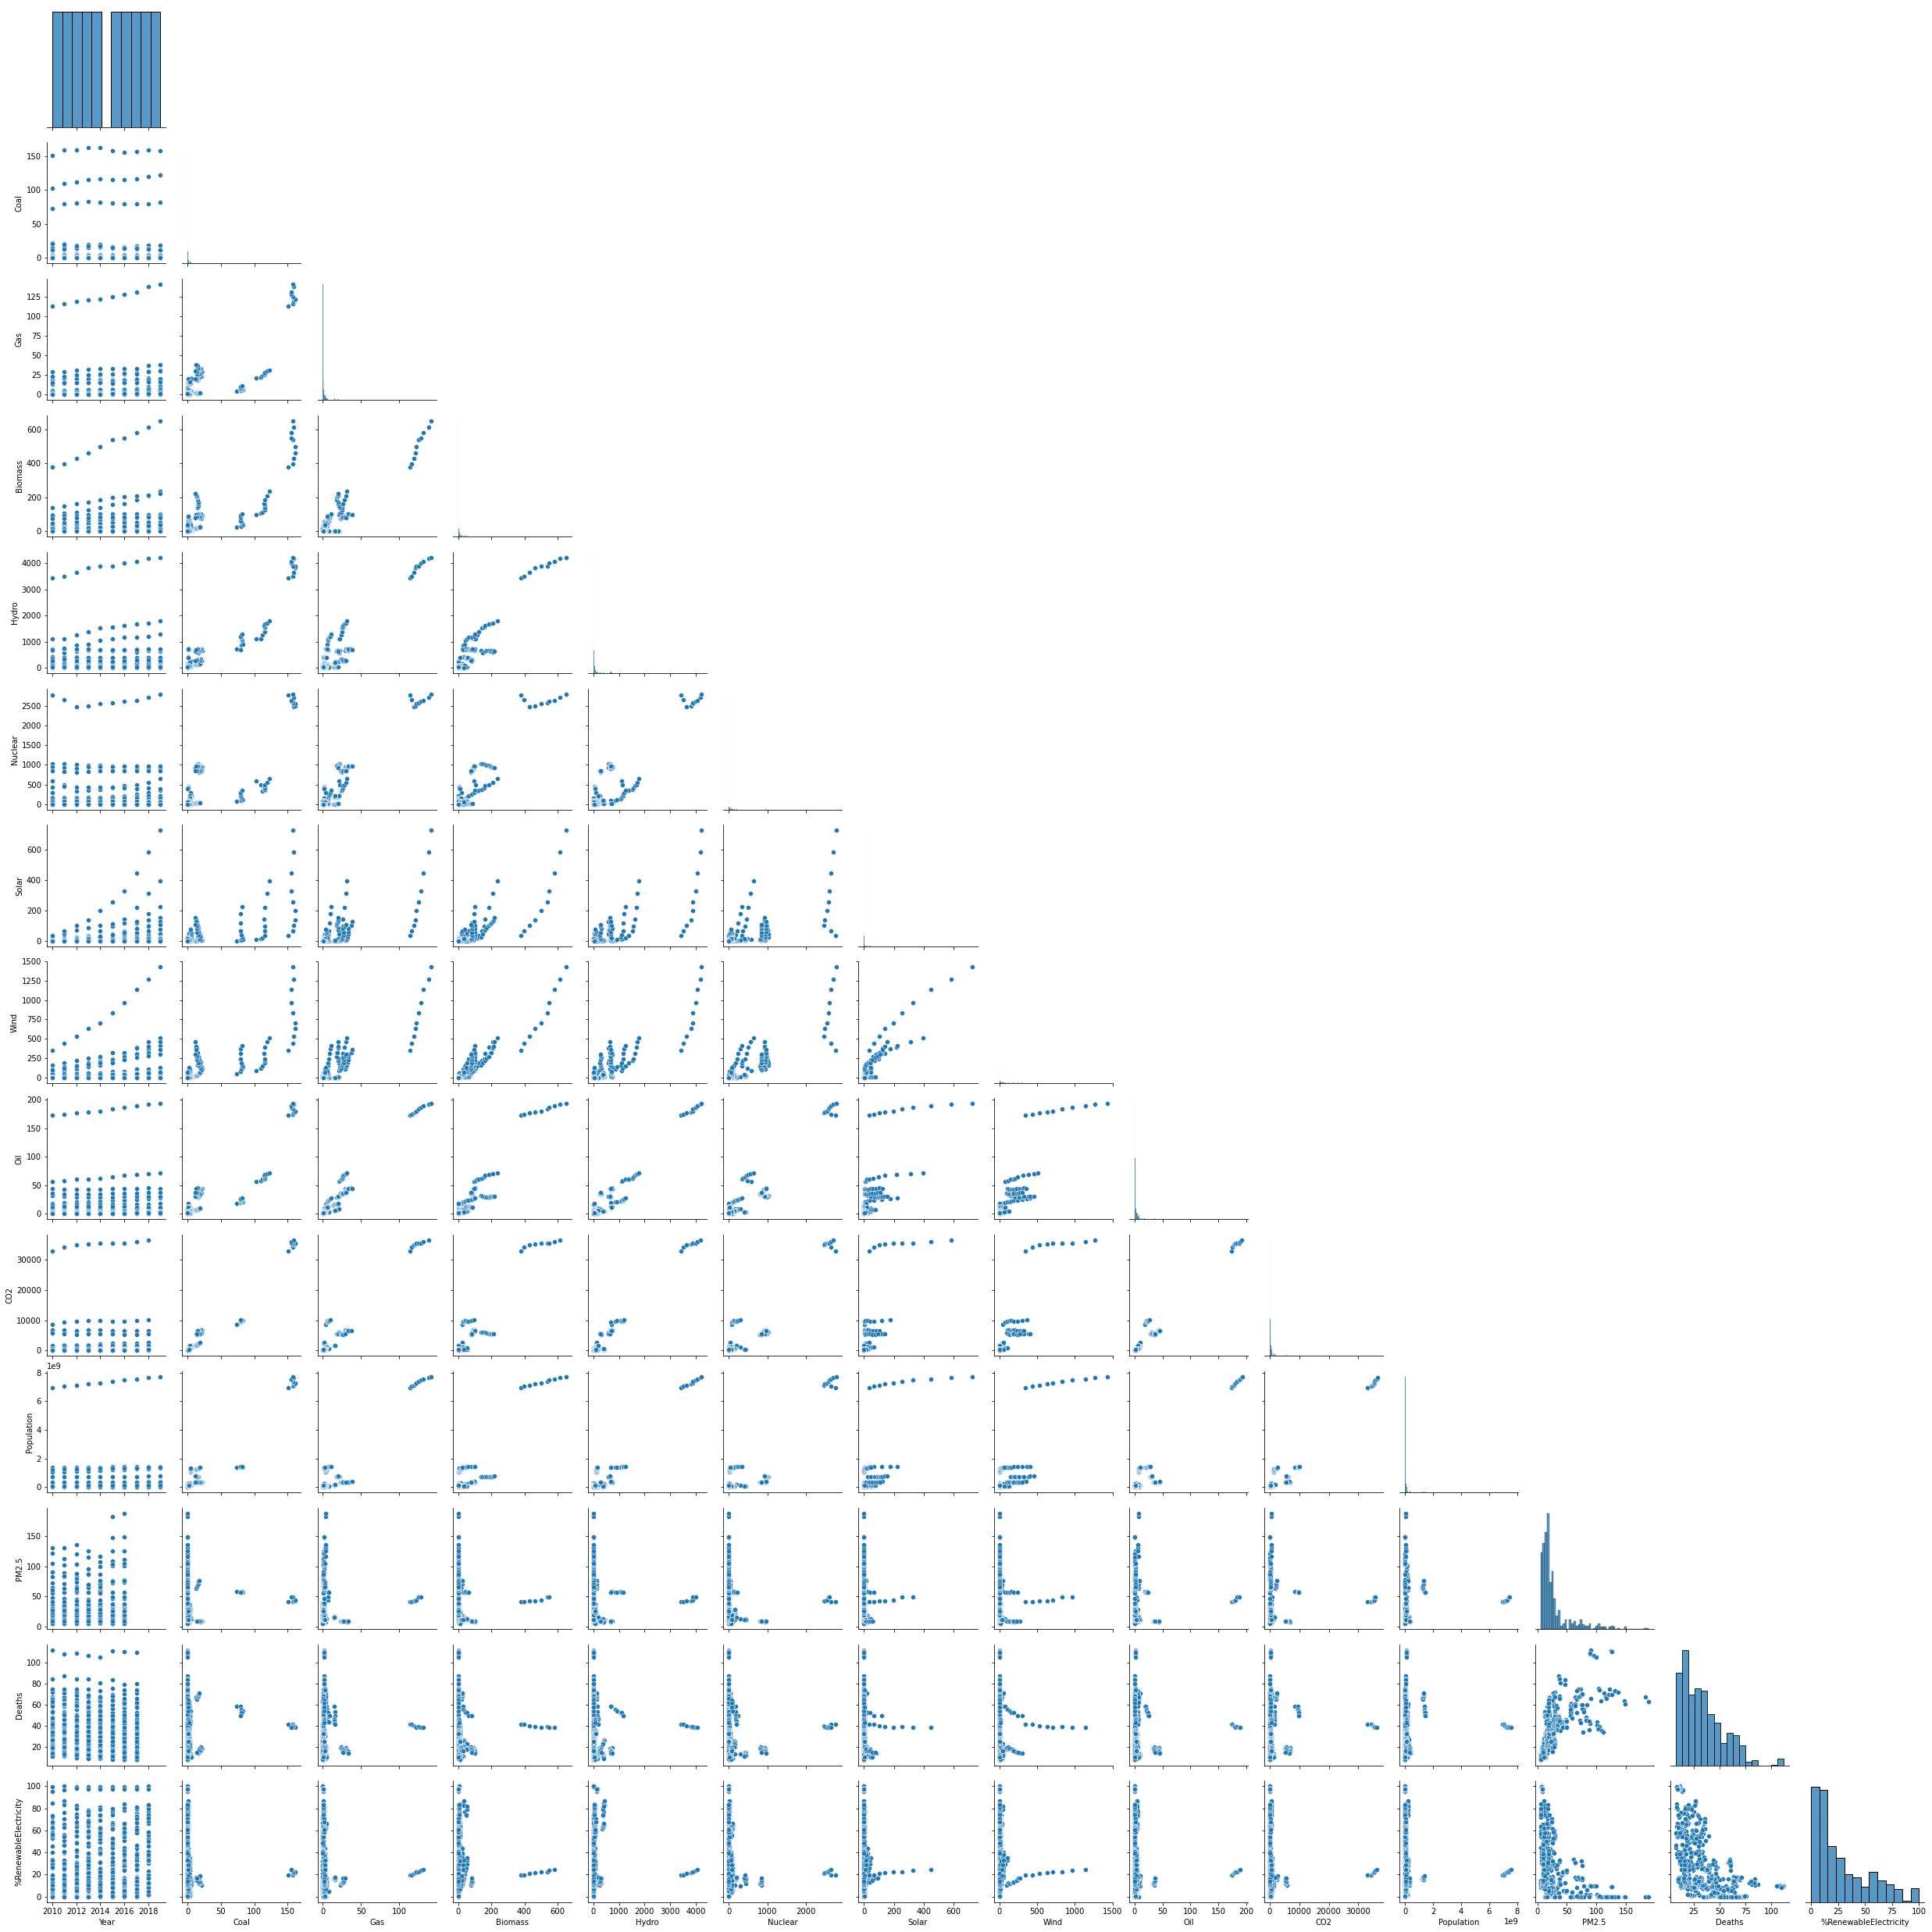

In [125]:

ax = sns.pairplot(energy_co2_death_green, corner=True)

In [185]:
#Remove the world first line to get comprehensive data
energy_grouped = energy_co2_death_green.groupby(['Country']).mean().sort_values(by='Coal', ascending=False).iloc[1:].drop(['Year'], axis=1)
energy_grouped.describe()

,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,82.000000,8.200000e+01,78.000000,79.000000,72.000000
mean,3.254890,2.591925,10.536409,79.694082,54.128021,5.928202,17.102061,3.761448,569.524938,1.007051e+08,28.068272,33.571778,26.917775
std,14.289989,5.950045,28.553973,216.894981,172.206953,18.971040,53.612043,9.331893,1527.818505,2.556304e+08,27.626477,20.135243,25.648881
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035847,3.534221,3.297000e+05,5.391961,9.141243,0.000000
25%,0.033946,0.147199,0.095191,1.880824,0.000000,0.040333,0.044234,0.393626,45.829041,6.047725e+06,12.793364,17.755958,9.223999
50%,0.169420,0.598940,0.718307,13.175123,0.000000,0.335462,0.676663,0.805876,101.618631,2.216615e+07,18.516193,30.139523,15.805957
75%,0.738032,1.630479,5.999826,39.890692,15.678088,1.969107,5.682896,2.642925,367.145652,6.524380e+07,27.853889,44.891238,41.377170
max,114.366412,33.044537,184.214017,1473.997665,974.460635,129.646415,295.787467,63.921412,9607.101765,1.402420e+09,144.272121,108.833189,99.983584


<AxesSubplot:>

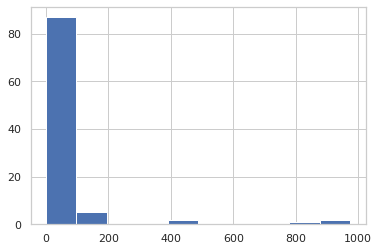

In [186]:
energy_grouped['Nuclear'].hist()

<AxesSubplot:>

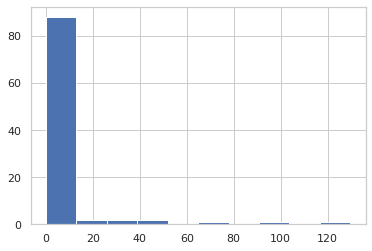

In [188]:
energy_grouped['Solar'].hist()

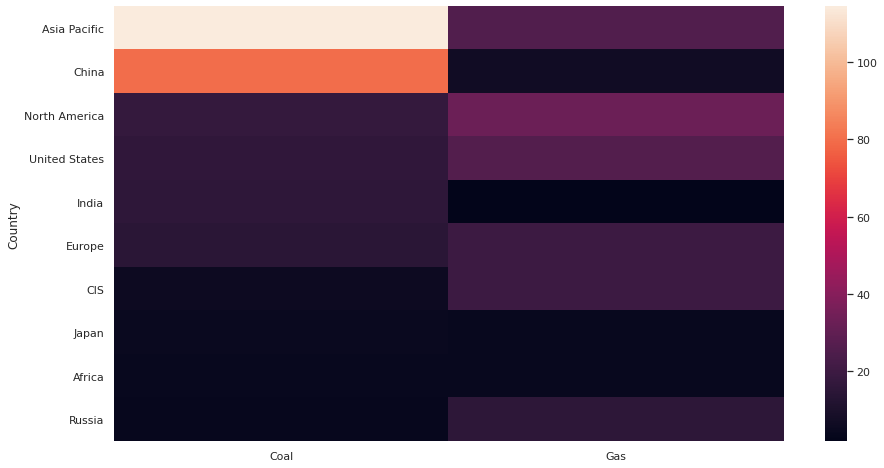

In [189]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.heatmap(energy_grouped.iloc[:,0:2].head(10))

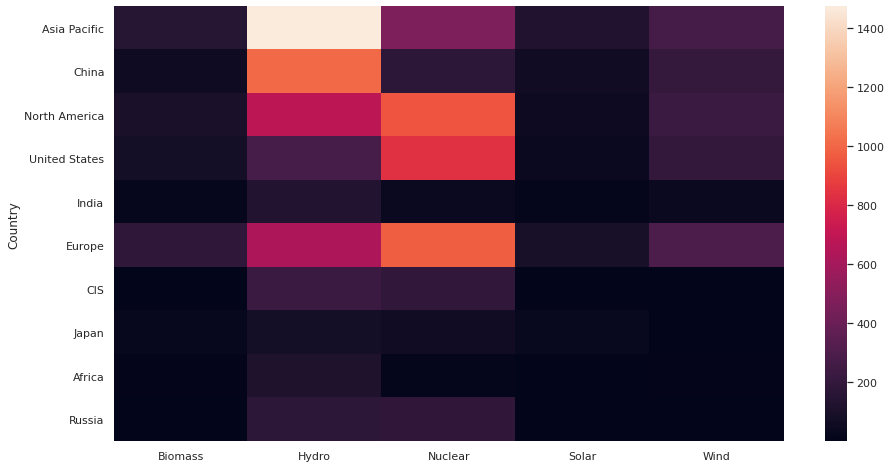

In [190]:
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.heatmap(energy_grouped.iloc[:,2:7].head(10))

In [194]:
ebc_light = energy_co2_death_green[(energy_co2_death_green.Country == 'Iceland') | (energy_co2_death_green.Country == 'France') | (energy_co2_death_green.Country == 'Australia')]
ebc_light.head()

,Country,Year,Coal,Gas,Biomass,Hydro,Nuclear,Solar,Wind,Oil,CO2,Population,PM2.5,Deaths,%RenewableElectricity
40,Australia,2010,2.186381,1.216211,2.441550,13.746,0.0,0.977648,4.985,1.818086,406.425942,22155000.0,5.937561,13.140380,8.598495
41,Australia,2011,2.131171,1.270191,2.573950,19.572,0.0,2.044547,6.432,1.936222,404.263695,22538000.0,5.880919,13.276676,10.355690
42,Australia,2012,1.995833,1.274064,3.097850,17.036,0.0,2.412000,7.725,2.011291,406.986985,22904000.0,5.981776,12.196401,10.492490
43,Australia,2013,1.894233,1.338245,3.331650,19.089,0.0,3.847400,9.259,2.047592,398.051591,23255000.0,6.028238,11.384154,13.122810
44,Australia,2014,1.878550,1.443597,3.546362,14.484,0.0,4.952000,9.777,2.069432,393.288532,23596000.0,5.933055,10.939491,14.598490


<AxesSubplot:label='15f6179a-dc77-4468-95a8-b212f2db51f4', xlabel='Year', ylabel='Solar'>

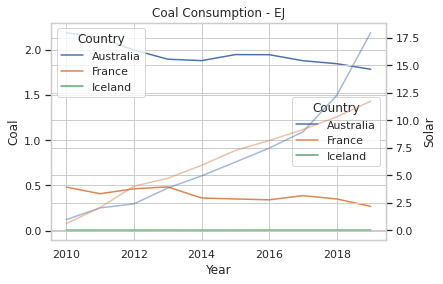

In [196]:
sns.lineplot(data=ebc_light, x="Year", y="Coal", hue="Country", color='g').set_title('Coal Consumption - EJ')
ax2 = plt.twinx()
sns.lineplot(data=ebc_light, x="Year", y="Solar", hue="Country", color='b', alpha=0.5, ax=ax2)

In [149]:
co2_by_country_light = co2_by_country[(co2_by_country.Entity == 'Iceland') | (co2_by_country.Entity == 'France') | (co2_by_country.Entity == 'Australia')]
co2_by_country_light.head()

,Entity,Code,Year,Annual CO2 emissions
1531,Australia,AUS,1851,-0.062288
1532,Australia,AUS,1852,-0.054960
1533,Australia,AUS,1853,-0.109920
1534,Australia,AUS,1854,-0.128240
1535,Australia,AUS,1855,-0.131904


Text(0.5, 1.0, 'Annual CO2 emissions by country')

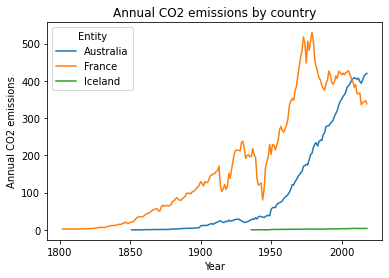

In [150]:
sns.lineplot(data=co2_by_country_light, x="Year", y="Annual CO2 emissions", hue="Entity").set_title('Annual CO2 emissions by country')

In [151]:
co2_grouped = co2_by_country.groupby(['Entity']).mean().drop(['Year'], axis=1).reset_index().sort_values(by='Annual CO2 emissions', ascending=False)
co2_grouped

,Entity,Annual CO2 emissions
114,KP Annex B,12721.770477
170,OECD,11192.793896
165,Non-OECD,10328.615514
164,Non KP Annex B,8799.638933
246,World,6014.242731
...,...,...
245,Wallis and Futuna Islands,0.025357
232,Tuvalu,0.009128
189,Saint Helena,0.009120
7,Antarctic Fisheries,0.007328


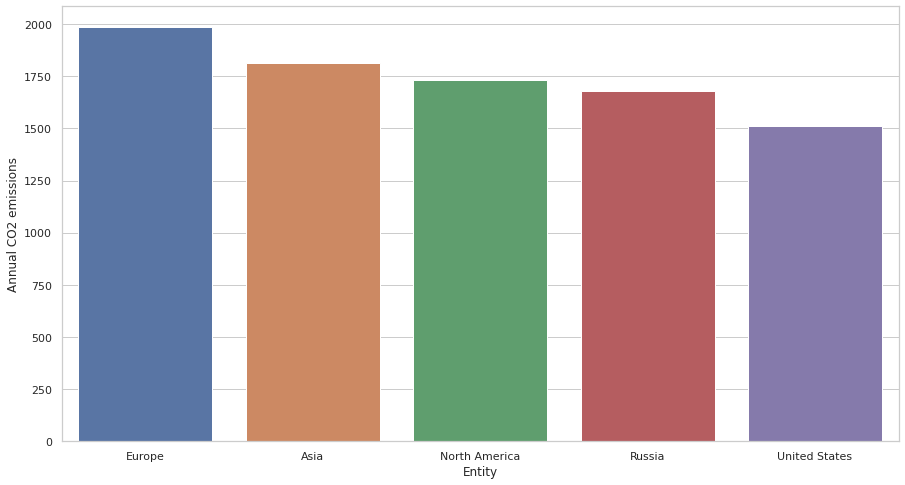

In [152]:
sns.set_theme(style="whitegrid")
fig, ax = pyplot.subplots(figsize=(15,8))
ax = sns.barplot(x="Entity", y="Annual CO2 emissions",data=co2_grouped.iloc[5:10])

In [153]:
pollution_by_country = pollution_by_region[(pollution_by_region.VAR == 'AIR_POL') & (pollution_by_region['Territory level and Typology'] == 'Country')]
pollution_by_country.head()

,TL,Territory level and Typology,REG_ID,Region,VAR,Indicator,POS,Position,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,3.880,NaN,NaN
1,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2006,2006,NaN,NaN,0,Units,NaN,NaN,3.301,NaN,NaN
4,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2009,2009,NaN,NaN,0,Units,NaN,NaN,3.594,NaN,NaN
5,1,Country,AUS,Australia,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2012,2012,NaN,NaN,0,Units,NaN,NaN,7.000,NaN,NaN
54,1,Country,AUT,Austria,AIR_POL,Air Pollution in PM2.5 (average level in µg/m³...,ALL,All regions,2003,2003,NaN,NaN,0,Units,NaN,NaN,19.677,NaN,NaN


Text(0.5, 1.0, 'CO2 Emissions in ug/m3')

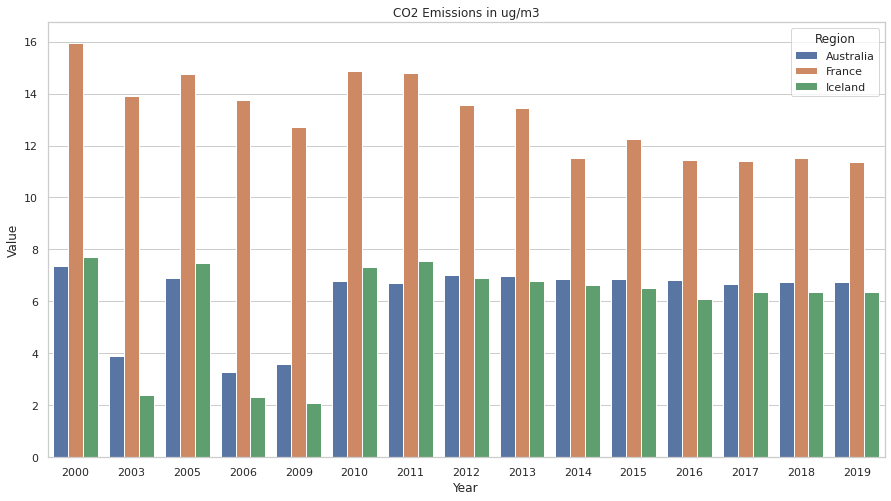

In [154]:
pollution_by_countrylight = pollution_by_country[(pollution_by_country.Region == 'Iceland') | (pollution_by_country.Region == 'France') | (pollution_by_country.Region == 'Australia')]
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(data=pollution_by_countrylight, x="Year", y="Value", hue="Region").set_title('CO2 Emissions in ug/m3')

In [ ]:
deaths_grouped = deaths_by_particle_vs_pm25.drop(['Continent','Year'], axis=1).groupby('Entity').mean().dropna().reset_index()
deaths_grouped

In [ ]:
dbppm25 = deaths_by_particle_vs_pm25[(deaths_by_particle_vs_pm25.Entity == 'Iceland') | (deaths_by_particle_vs_pm25.Entity == 'France') | (deaths_by_particle_vs_pm25.Entity == 'Australia')]
sns.lineplot(data=dbppm25, x="Year", y="Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)", hue="Entity").set_title('Death by PM25 Particles')
sns.lineplot(data=dbppm25, x="Year", y="PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)", hue="Entity").set_title('Death by PM25 Particles')


In [ ]:
pm25Vdeath = deaths_by_particle_vs_pm25.sort_values(by=['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'], ascending=False).dropna().head(None)
pm25Vdeath = pm25Vdeath[pm25Vdeath.Year.between(2010,2020,inclusive=True)]
pm25Vdeath = pm25Vdeath.rename(columns={"Deaths - Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)":"Deaths - Ambient particulate matter pollution"})
pm25Vdeath = pm25Vdeath.rename(columns={"Total population (Gapminder, HYDE & UN)":"Total population"})
pm25Vdeath = pm25Vdeath.rename(columns={"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)": "PM2.5 air pollution (μg per cm3)"})

sns.scatterplot(
    data=pm25Vdeath, x="Deaths - Ambient particulate matter pollution", y="PM2.5 air pollution (μg per cm3)", hue="Entity", size="Total population",
    sizes=(20, 200), legend=False
)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
pm25Vdeath.sort_values(by=['PM2.5 air pollution (μg per cm3)'], ascending=False)

In [ ]:
pm25Vdeath.sort_values(by=['Deaths - Ambient particulate matter pollution'], ascending=False)

In [ ]:
green_indicators.info()

In [ ]:
#green_indicators.Variable.unique()
green_indicators.Unit.unique()

In [ ]:
percent_renewable_energy_supply = green_indicators[green_indicators.Variable == 'Renewable energy supply, % total energy supply']
percent_renewable_energy_supply.sort_values('Value', ascending=False)

In [ ]:
renewable = percent_renewable_energy_supply[(percent_renewable_energy_supply.Country == 'Iceland') | (percent_renewable_energy_supply.Country == 'France') | (percent_renewable_energy_supply.Country == 'Australia')]
sns.lineplot(data=renewable, x="Year", y="Value", hue="Country").set_title('% Renewable energy by country')


In [ ]:
mean_percent = percent_renewable_energy_supply.groupby('Country').mean().sort_values('Value', ascending = False).drop(['YEA','Year','PowerCode Code'], axis = 1)
mean_percent

In [ ]:
sns.histplot(data=mean_percent, binwidth=3, kde=True)

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=mean_percent.Value)

In [ ]:
df = green_indicators[green_indicators.Variable == 'Welfare costs of premature mortalities from exposure to ambient PM2.5, GDP equivalent']
premature_mortalities_pm25 = df[(df.Country == 'Iceland') | (df.Country == 'France') | (df.Country == 'Australia')]
sns.lineplot(data=premature_mortalities_pm25, x="Year", y="Value", hue="Country").set_title('Premature mortalities by pm25 cost')

In [ ]:
fossil_fuel_prices = pd.read_csv("./Environment-Equity Datasets/Corporations/Fossil Fuel Prices (1989-2019).csv")
fossil_fuel_prices.dataframeName = 'Fossil Fuel Prices (1989-2019)'
nRow, nCol = fossil_fuel_prices.shape
print(f'There are {nRow} rows and {nCol} columns')
fossil_fuel_prices.head()

In [ ]:
fossil_fuel_prices.info()

In [ ]:
fossil_fuel_prices_2010to2019 = fossil_fuel_prices[fossil_fuel_prices.Year.between(2010,2020)]
renewable_energy_mw_mean = renewable_energy_stats.groupby('Year').mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(fossil_fuel_prices_2010to2019.Year, fossil_fuel_prices_2010to2019['Coal (Northwest Europe Marker Price)/US dollars per tonne'])
ax2.plot(fossil_fuel_prices_2010to2019.Year, renewable_energy_mw_mean['Cumulative Deployment (MW)'], 'o-', color="red" )

ax1.set_xlabel('X data')
ax1.set_ylabel('Coal Price / Tonne', color='b')
ax2.set_ylabel('Renewable Energy (MW)', color='r')

plt.show()

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Average Percipitation Percentage by Month', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16)
ax1 = sns.barplot(x =renewable_energy_mw_mean.Year, y=fossil_fuel_prices_2010to2019['Coal (Northwest Europe Marker Price)/US dollars per tonne'].values, palette='summer')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Avg Percipitation %', fontsize=16)
ax2 = sns.lineplot(x=renewable_energy_mw_mean.Year, y=renewable_energy_mw_mean['Cumulative Deployment (MW)'], sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()

In [ ]:
renewable_energy_mw_mean.Year

In [ ]:
renewable_energy_mw_mean

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
plotScatterMatrix(green_indicators, 10, 10)